# 데이터 불러오기

전처리했던 csv 파일로

In [22]:
import pandas as pd

file_path = '../data/Compensation_pre.csv'
data = pd.read_csv(file_path, index_col =0)
data

,지역,학교급,사고자구분,사고자학년,사고자성별,사고시간,사고장소,사고부위,사고형태,사고당시활동,추정나이,보상급여
0,전남,고등학교,일반학생,2학년,남,쉬는시간,강당(체육관),골반/엉덩이,그밖의 손상 사고,기타,17,31900
1,대구,초등학교,일반학생,6학년,여,체육,운동장,두피,그밖의 손상 사고,기타 스포츠 활동,12,53000
2,경남,고등학교,일반학생,1학년,남,그 밖의 교육활동 시간,기타 교외,기타,그밖의 손상 사고,기타,16,15027050
3,전북,초등학교,일반학생,5학년,남,쉬는시간,일반(교과)교실,어깨,그밖의 손상 사고,기타,11,3114900
4,제주,초등학교,일반학생,2학년,남,식사시간(간식 포함),기타 교외,치아,고정된 물체와의 부딪힘,기타,8,1106500
...,...,...,...,...,...,...,...,...,...,...,...,...
425209,서울,중학교,일반학생,3학년,여,체육,강당(체육관),손가락,고정된 물체와의 부딪힘,피구,15,97200
425210,서울,초등학교,일반학생,5학년,남,체육,강당(체육관),복합부위,사람과의 부딪힘,기타 구기,11,585950
425211,서울,기타학교,일반학생,3학년,여,현장학습,기타 교외,무릎,넘어짐,"걷기/뛰기, 오르내리기",18,0
425212,서울,기타학교,일반학생,2학년,여,쉬는시간,계단,어깨,넘어짐,"걷기/뛰기, 오르내리기",17,284910


# 각 변수별 unique 확인

변수 별 unique 확인을 통해 분석할 방향을 정함
데이터 type 변경을 위함

- 확인 결과, 각 Dtype이 알맞게 배치되어 있음

In [24]:
# 각 변수별 타입 확인
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 424177 entries, 0 to 425213
Data columns (total 12 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   지역      424177 non-null  object
 1   학교급     424177 non-null  object
 2   사고자구분   424177 non-null  object
 3   사고자학년   424177 non-null  object
 4   사고자성별   424177 non-null  object
 5   사고시간    424177 non-null  object
 6   사고장소    424177 non-null  object
 7   사고부위    424177 non-null  object
 8   사고형태    424177 non-null  object
 9   사고당시활동  424177 non-null  object
 10  추정나이    424177 non-null  int64 
 11  보상급여    424177 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 42.1+ MB


In [25]:
max(data['보상급여'])

1010000000

# 변수 별 빈도 확인

변수 별 범주 내 발생 빈도 확인

In [26]:
import matplotlib.font_manager as fm

fm.fontManager.__init__()

fonts = [f.name for f in fm.fontManager.ttflist if 'Nanum' in f.name]
print("설치된 나눔폰트:", fonts)

설치된 나눔폰트: ['Nanum Brush Script', 'NanumGothicCoding', 'NanumGothic', 'NanumMyeongjo', 'NanumSquare', 'NanumSquare_ac', 'NanumMyeongjo Eco', 'NanumBarunGothic YetHangul', 'NanumBarunpen', 'NanumSquareRound', 'NanumGothic', 'NanumGothic Eco', 'NanumSquare_ac', 'NanumBarunpen', 'NanumBarunGothic', 'NanumSquare', 'NanumBarunGothic', 'NanumGothic Eco', 'NanumSquare', 'NanumBarunGothic', 'NanumGothicCoding', 'NanumMyeongjo', 'Nanum Pen Script', 'NanumSquareRound', 'NanumGothic', 'NanumGothic Eco', 'NanumSquare_ac', 'NanumMyeongjo', 'NanumGothic', 'NanumSquare_ac', 'NanumSquareRound', 'NanumMyeongjo YetHangul', 'NanumMyeongjo Eco', 'NanumBarunGothic', 'NanumMyeongjo Eco', 'NanumMyeongjo Eco', 'NanumGothic Eco', 'NanumSquareRound', 'NanumSquare']


In [39]:
eda_summary = []

for col in data.columns:
    top_vals = data[col].value_counts(dropna=False).head(5).to_dict()
    eda_summary.append({
        "Column": col,
        "Dtype": data[col].dtype,
        "Missing": data[col].isna().sum(),
        "Unique": data[col].nunique(dropna=False),
        "Top Values": top_vals
    })

eda_df = pd.DataFrame(eda_summary)
eda_df


,Column,Dtype,Missing,Unique,Top Values
0,지역,object,0,17,"{'경기': 110841, '서울': 63171, '경남': 29905, '부산':..."
1,학교급,object,0,6,"{'초등학교': 155417, '중학교': 145186, '고등학교': 87369,..."
2,사고자구분,object,0,3,"{'일반학생': 410115, '체육특기학생': 10010, '특수학교(학급)학생'..."
3,사고자학년,object,0,7,"{'1학년': 101135, '2학년': 99198, '3학년': 89937, '6..."
4,사고자성별,object,0,2,"{'남': 284871, '여': 139306}"
5,사고시간,object,0,33,"{'체육': 145955, '식사시간(간식 포함)': 68572, '쉬는시간': 6..."
6,사고장소,object,0,48,"{'운동장': 121112, '강당(체육관)': 115839, '일반(교과)교실':..."
7,사고부위,object,0,33,"{'손가락': 79353, '발목': 76005, '복합부위': 42606, '무릎..."
8,사고형태,object,0,29,"{'넘어짐': 135634, '고정된 물체와의 부딪힘': 96341, '스포츠 활동..."
9,사고당시활동,object,0,60,"{'걷기/뛰기, 오르내리기': 65452, '축구': 56011, '장난, 놀이':..."


In [40]:
for i in eda_df['Top Values']:
    print(i)

{'경기': 110841, '서울': 63171, '경남': 29905, '부산': 25321, '인천': 22371}
{'초등학교': 155417, '중학교': 145186, '고등학교': 87369, '유치원': 32996, '특수학교': 1816}
{'일반학생': 410115, '체육특기학생': 10010, '특수학교(학급)학생': 4052}
{'1학년': 101135, '2학년': 99198, '3학년': 89937, '6학년': 40301, '5학년': 33888}
{'남': 284871, '여': 139306}
{'체육': 145955, '식사시간(간식 포함)': 68572, '쉬는시간': 62047, '방과후과정': 18233, '이론수업': 16405}
{'운동장': 121112, '강당(체육관)': 115839, '일반(교과)교실': 59380, '계단': 29417, '복도': 24909}
{'손가락': 79353, '발목': 76005, '복합부위': 42606, '무릎': 26667, '발': 19546}
{'넘어짐': 135634, '고정된 물체와의 부딪힘': 96341, '스포츠 활동 중 충격을 가함': 40135, '움직이는 물체와의 부딪힘': 38819, '사람과의 부딪힘': 34547}
{'걷기/뛰기, 오르내리기': 65452, '축구': 56011, '장난, 놀이': 53415, '농구': 40725, '기타': 33689}
{13: 51294, 14: 47494, 15: 46398, 12: 40087, 17: 34168}
{100000: 458, 44100: 318, 51000: 317, 50000: 292, 44800: 291}


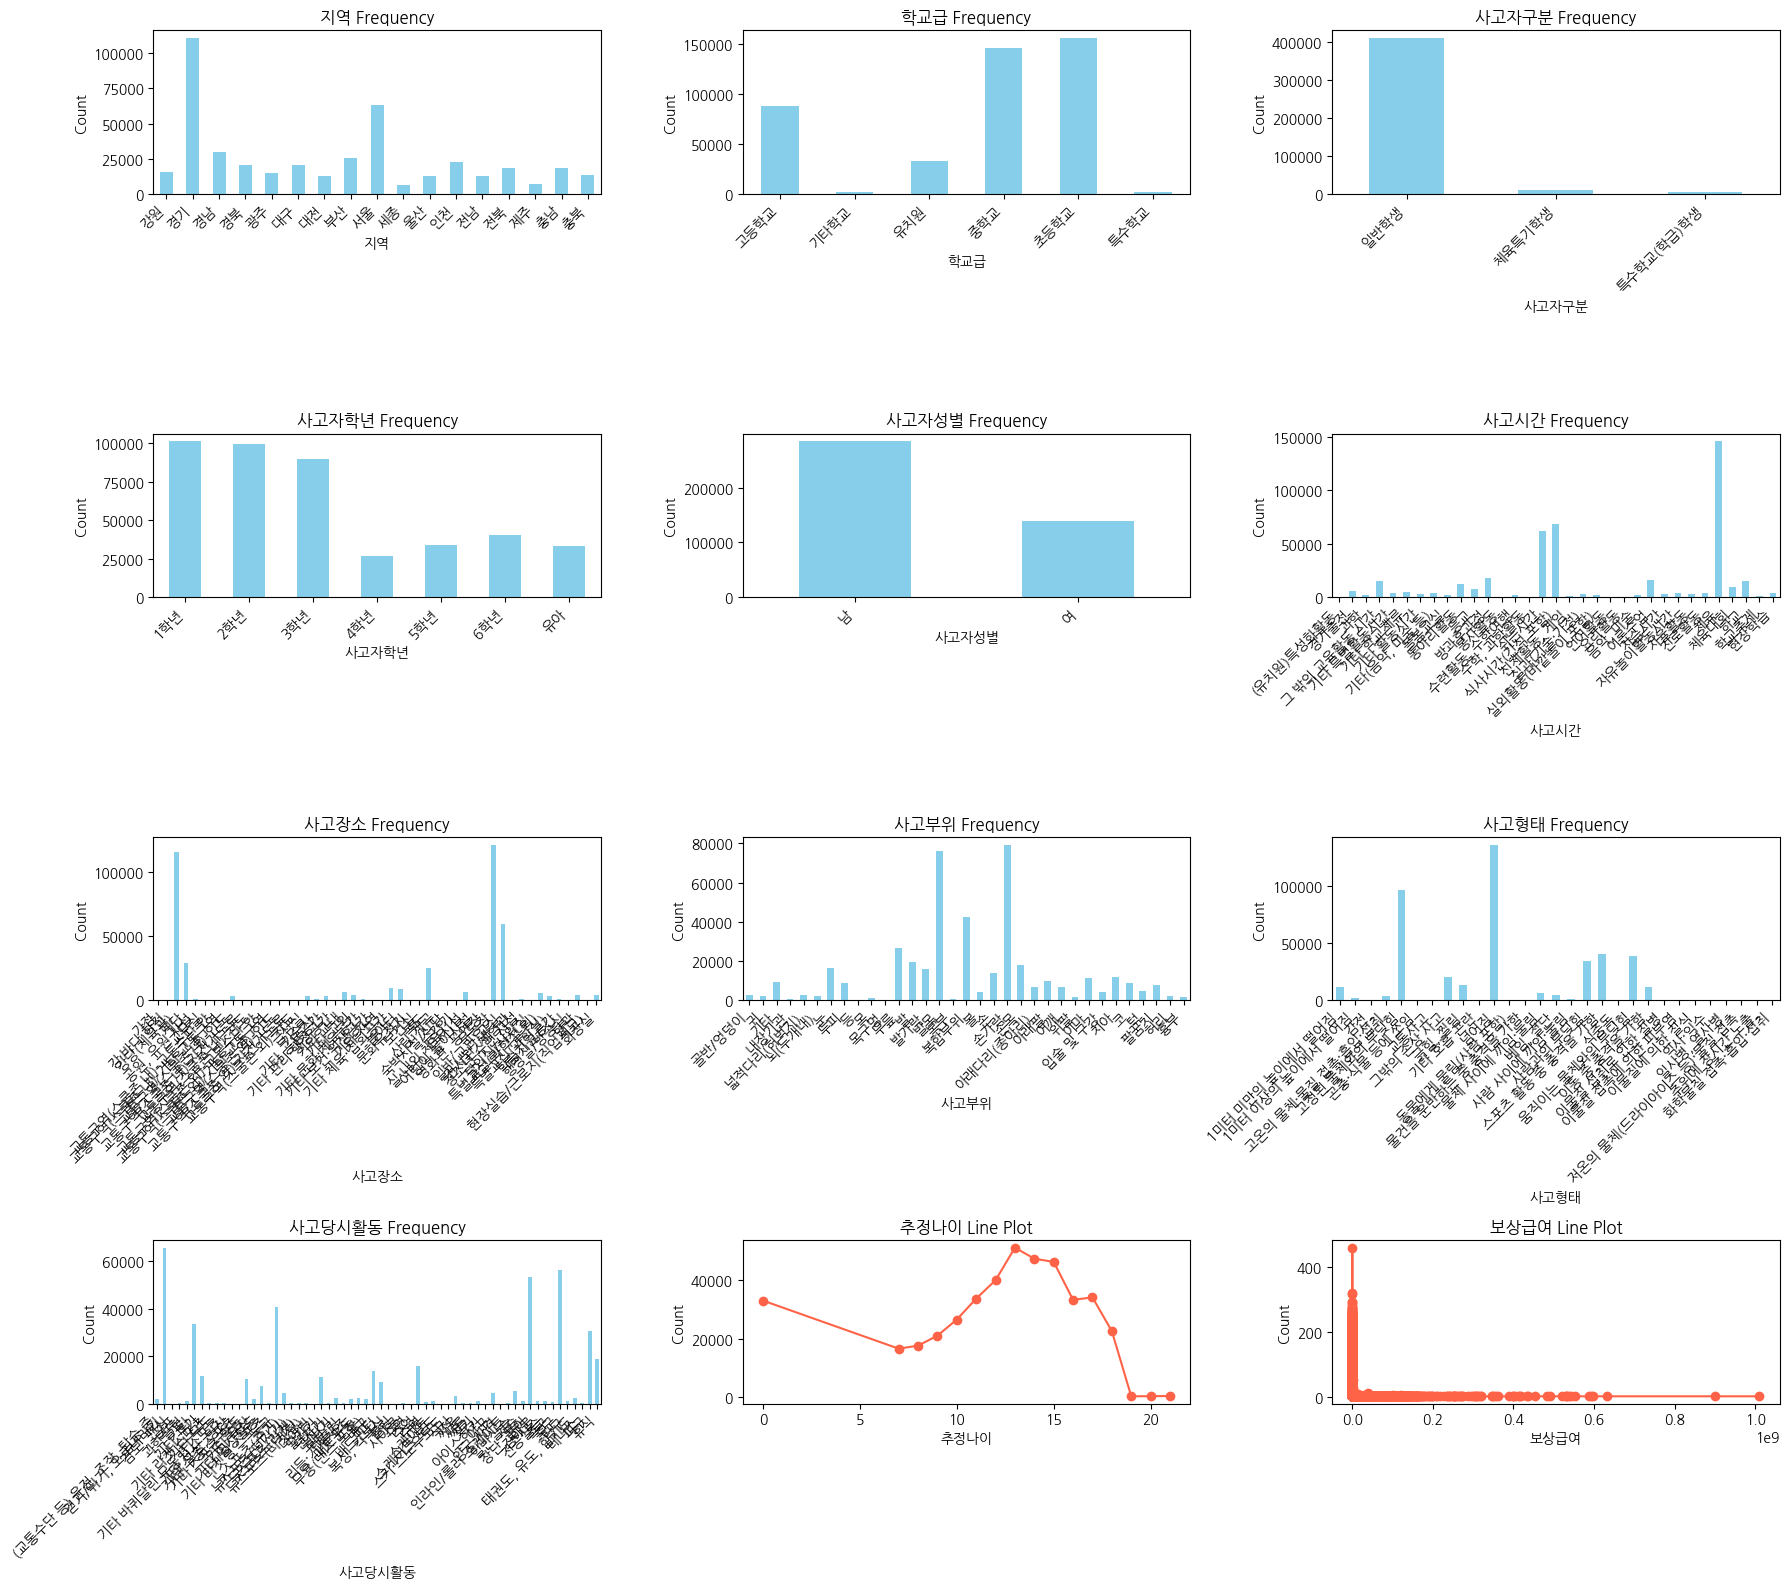

In [27]:
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['axes.unicode_minus'] = False

# 변수 구분
categorical_vars = [col for col in data.columns if data[col].dtype == 'object' or data[col].dtype.name == 'category']
numeric_vars = [col for col in data.columns if pd.api.types.is_integer_dtype(data[col])]

# 시각화할 전체 변수 리스트
all_vars = categorical_vars + numeric_vars

# 레이아웃 설정
n = len(all_vars)
n_cols = 3
n_rows = (n + n_cols - 1) // n_cols

plt.figure(figsize=(6 * n_cols, 4 * n_rows))

for idx, var in enumerate(all_vars, 1):
    plt.subplot(n_rows, n_cols, idx)

    if var in categorical_vars:
        # 범주형: 막대그래프
        data[var].value_counts().sort_index().plot(kind='bar', color='skyblue')
        plt.title(f'{var} Frequency')
        plt.xlabel(var)
        plt.ylabel('Count')
        plt.xticks(rotation=45, ha='right')
        
    elif var in numeric_vars:
        # 정수형: 선그래프
        counts = data[var].value_counts().sort_index()
        plt.plot(counts.index, counts.values, marker='o', linestyle='-', color='tomato')
        plt.title(f'{var} Line Plot')
        plt.xlabel(var)
        plt.ylabel('Count')

plt.tight_layout()
plt.show()


- 지역: 인구수 자체가 많은 서울, 경기권이 다수
- 학교급: 한참 뛰어다닐 초/중학생이 다수
- 사고자학년: 저학년인 1,2,3 학년 다수
- 성별: 비교적 더 활동적인 남자가 약 2배 더 많음
- 추정나이: 초등학교 고학년~중학교 저학년 때 많이 발생

- 사고 파일 분석과 거의 유사

나머지 범위가 많은 변수들은 따로 확인

In [28]:
def plotting_bar(data, var):
    # 값 개수 및 정렬
    counts = data[var].value_counts().sort_values(ascending=True)  # 오름차순 정렬로 보기 좋게
    total = counts.sum()
    
    # 그래프 크기 크게
    plt.figure(figsize=(12, 8))
    
    # 수평 막대 그래프
    bars = plt.barh(counts.index.astype(str), counts.values, color='skyblue')
    
    # 타이틀 및 축 레이블
    plt.title(f'{var} 빈도 및 비율', fontsize=20)
    plt.xlabel('Count', fontsize=16)
    plt.ylabel(var, fontsize=16)
    
    # 막대 끝에 빈도수 표시
    for bar, count in zip(bars, counts.values):
        width = bar.get_width()
        pct = count / total * 100
        plt.text(width + max(counts.values)*0.01,
                 bar.get_y() + bar.get_height()/2,
                 f'{int(count)} ({pct:.1f}%)',
                 va='center', fontsize=14)

    plt.tight_layout()
    plt.show()

def plotting_hist(data, var, lim1 = None, lim2 = None, bins=50,):
    
    # 그래프 크기 크게
    plt.figure(figsize=(12, 8))
    
    # 히스토그램
    counts, bin_edges, patches = plt.hist(data[var], bins=bins, color='skyblue', edgecolor='black')

    # 타이틀 및 축 레이블
    plt.title(f'{var} 히스토그램', fontsize=20)
    plt.xlabel(var, fontsize=16)
    plt.ylabel('Count', fontsize=16)
    plt.ylim([lim1, lim2])

    plt.tight_layout()
    plt.show()


### 사고 시간

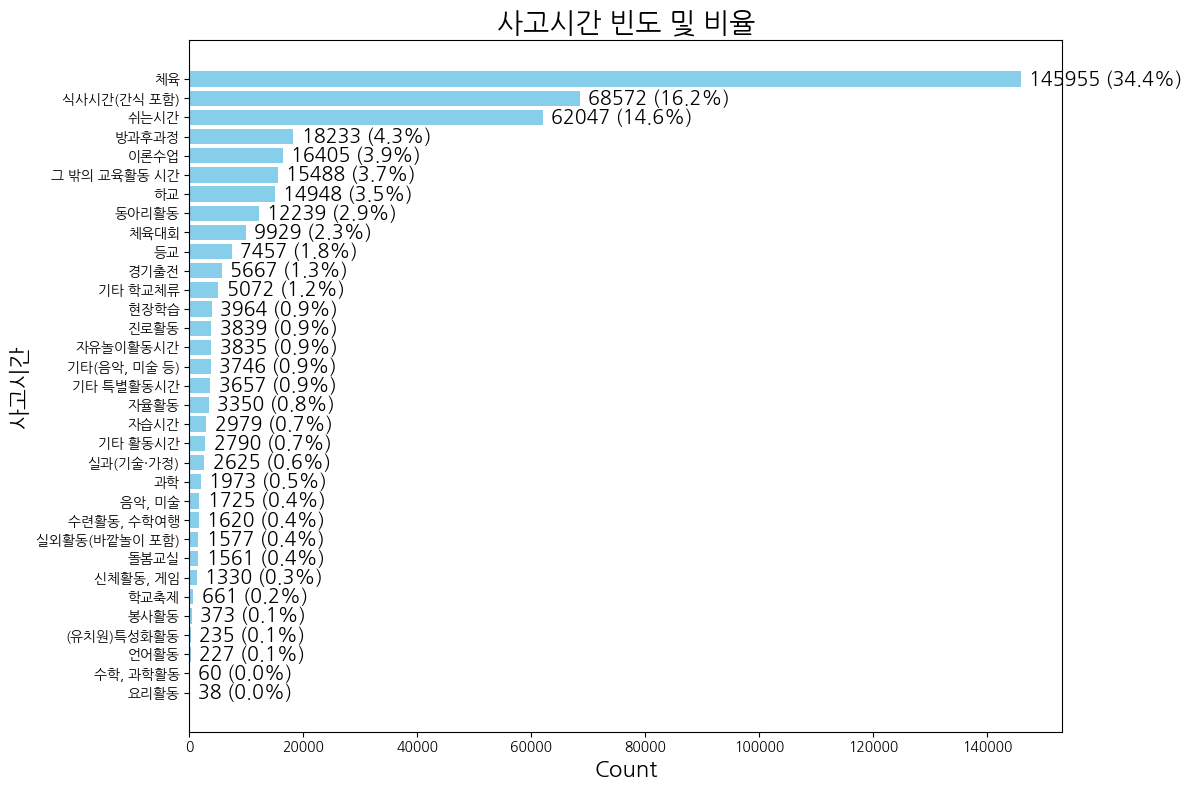

In [29]:
plotting_bar(data, '사고시간')

- 사고시간: 활동량이 많은 체육시간이 1/3 차지. 외에 식사시간(계단과 뛰어다니는 행동), 쉬는시간(수업시간보다 활동이 많음)을 포함하면 65.2% 차지

### 사고장소

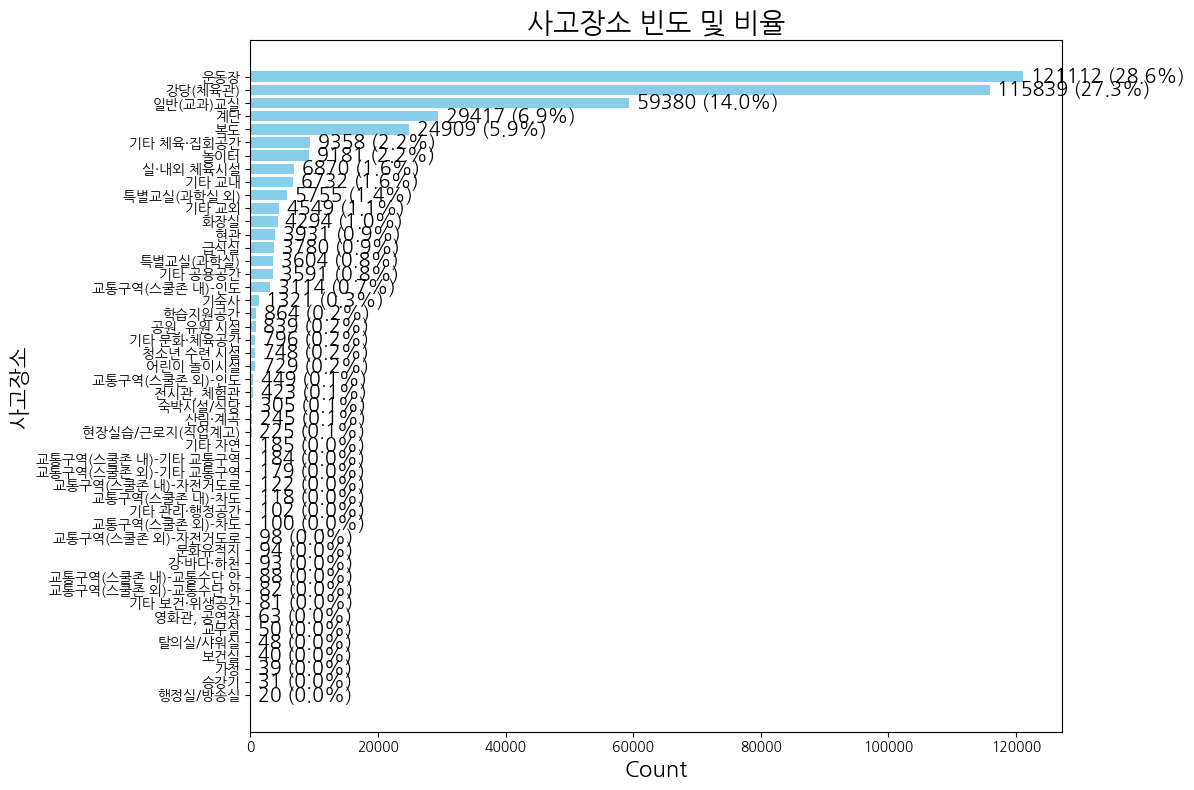

In [30]:
plotting_bar(data, '사고장소')

- 사고장소: 사고시간 분석과 유사하게 체육시간에 쓰이는 강당, 운동장 그리고 쉬는시간, 식사시간에 포함되는 교실, 계단 및 복도가 큼

### 사고형태

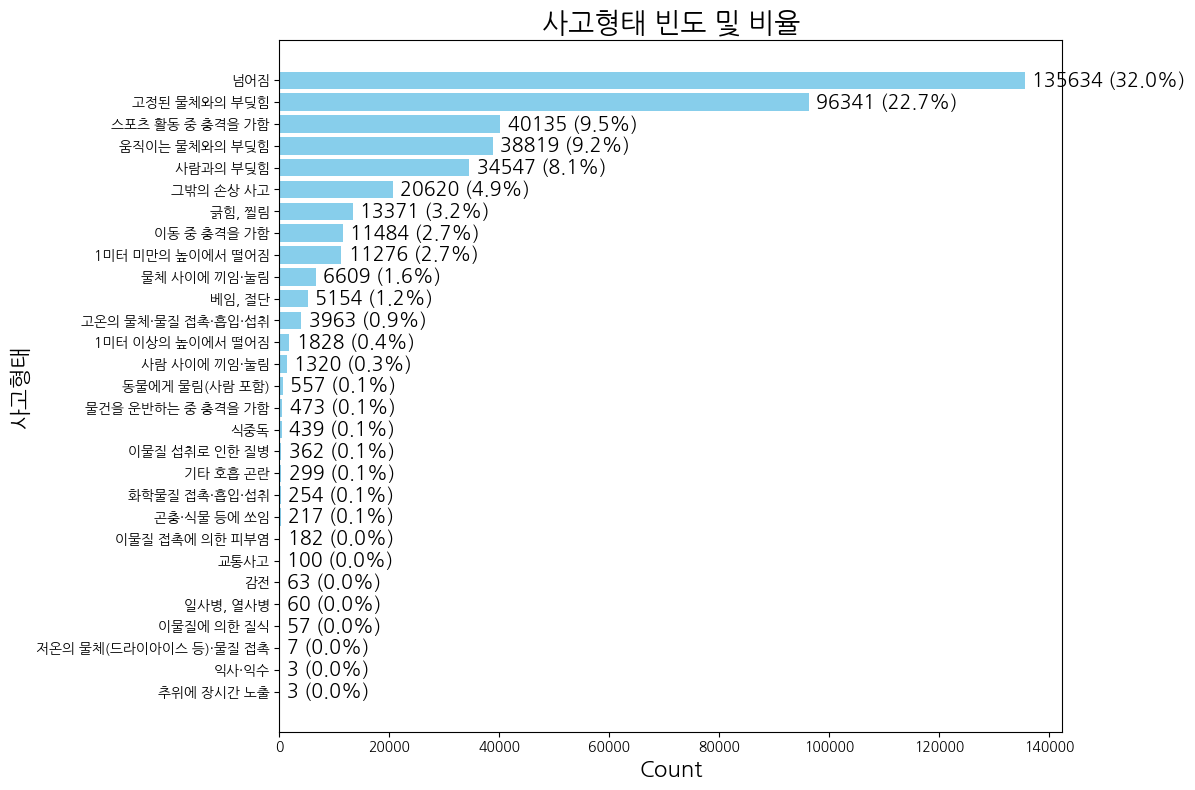

In [31]:
plotting_bar(data, '사고형태')

- 사고형태: 대부분의 형태가 넘어짐 + 부딪힘

### 사고당시활동

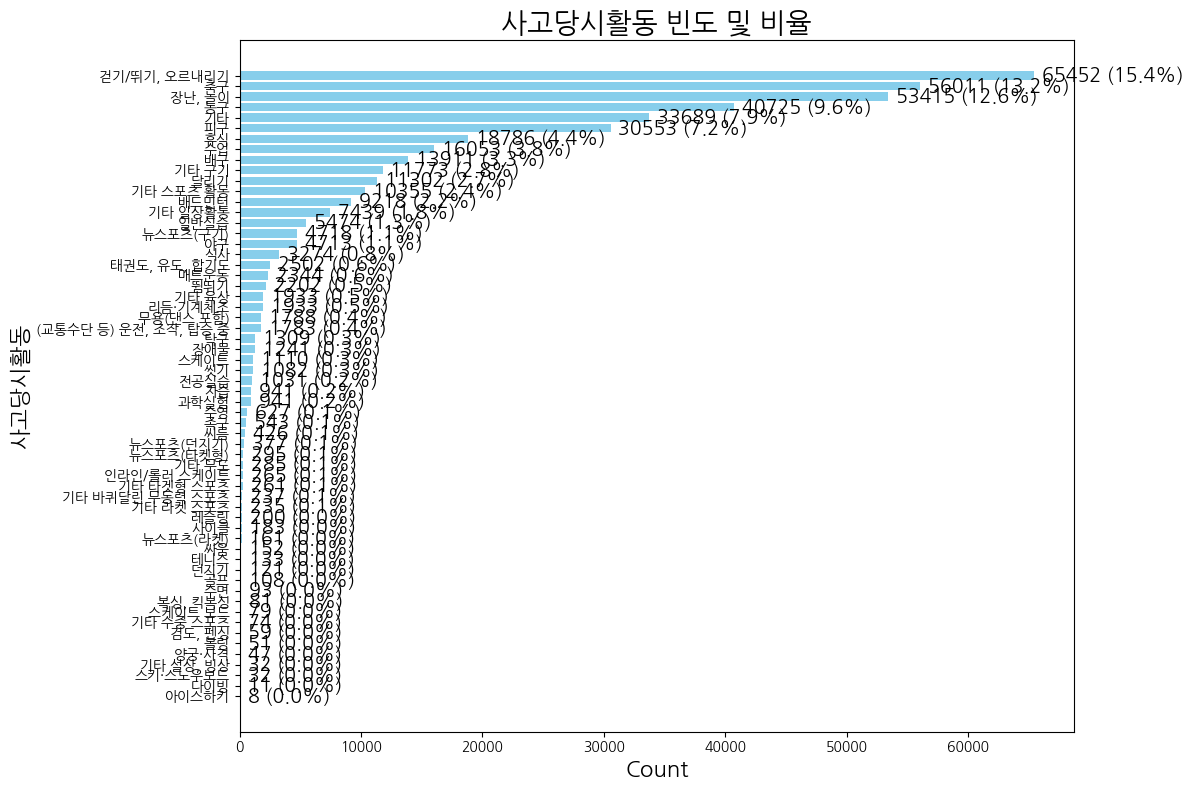

In [32]:
plotting_bar(data, '사고당시활동')

- 사고당시활동: 흔한 일들인 걷기/뛰기/오르내리기와 장난. 축구/농구/피구와 같은 다칠 가능성이 높은 체육활동들

### 사고부위

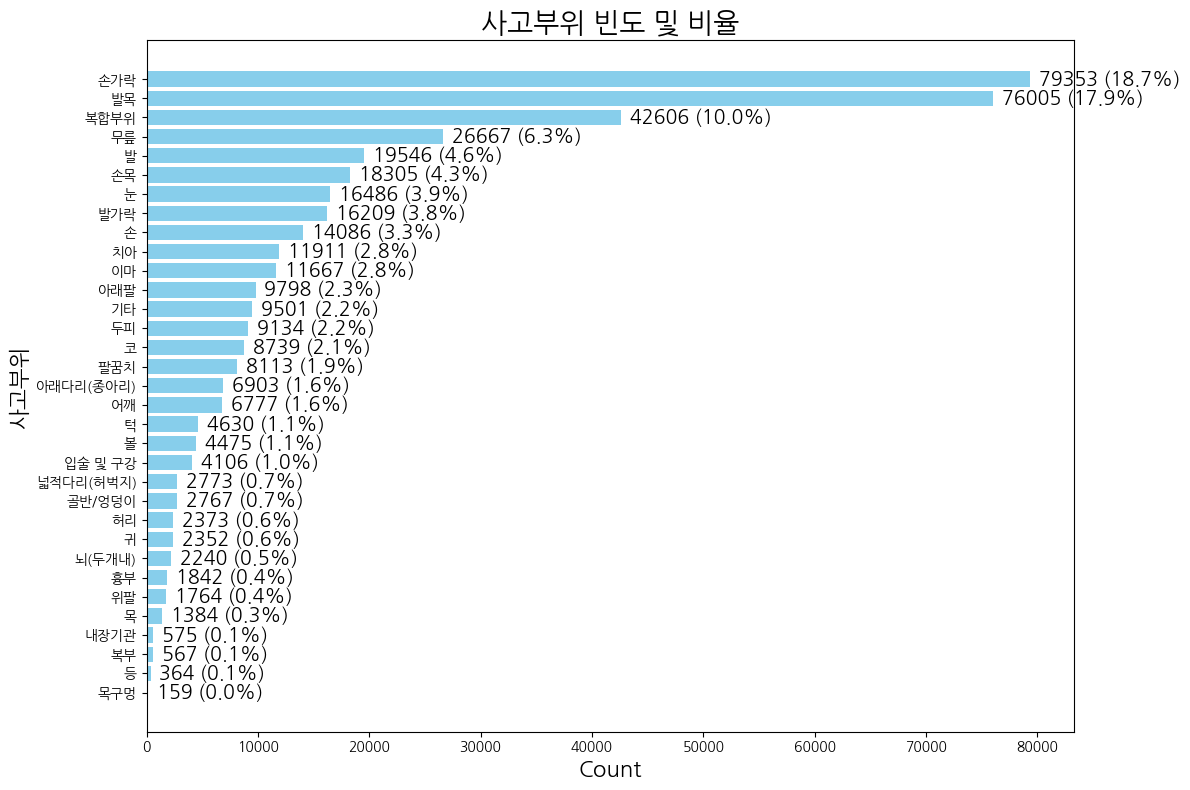

In [33]:
plotting_bar(data, '사고부위')

- 사고부위: 대부분 넘어졌을 때 쉽게 다칠 수 있고, 공에 부딪혀 다칠수 있는 손가락, 발목, 우릎 눈, 손목 등
많이 사용하는 손과 발이 큰 비중 차지.

### 보상급여

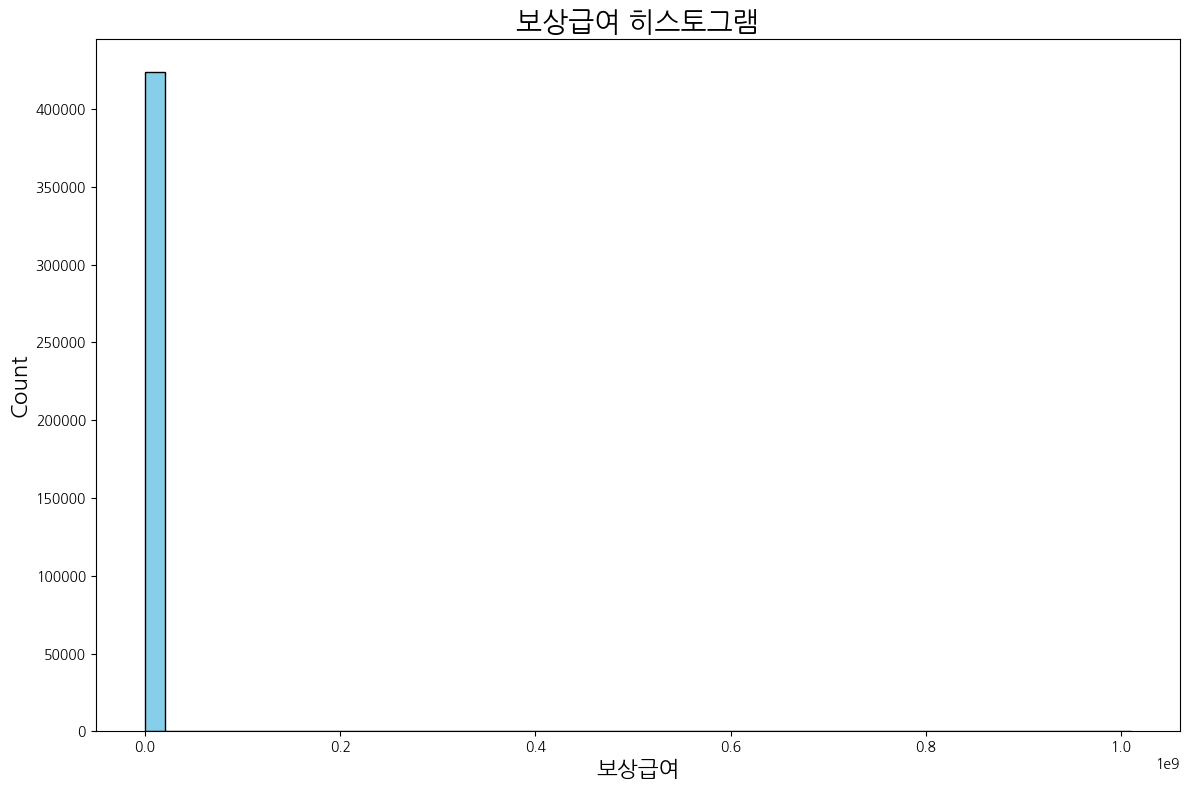

In [34]:
plotting_hist(data, '보상급여')

- 대부분이 0원에 포함됨. 크지는 않지만 자잘한 사고가 많이 이루어짐을 확인.
- 확대해서 확인해보자

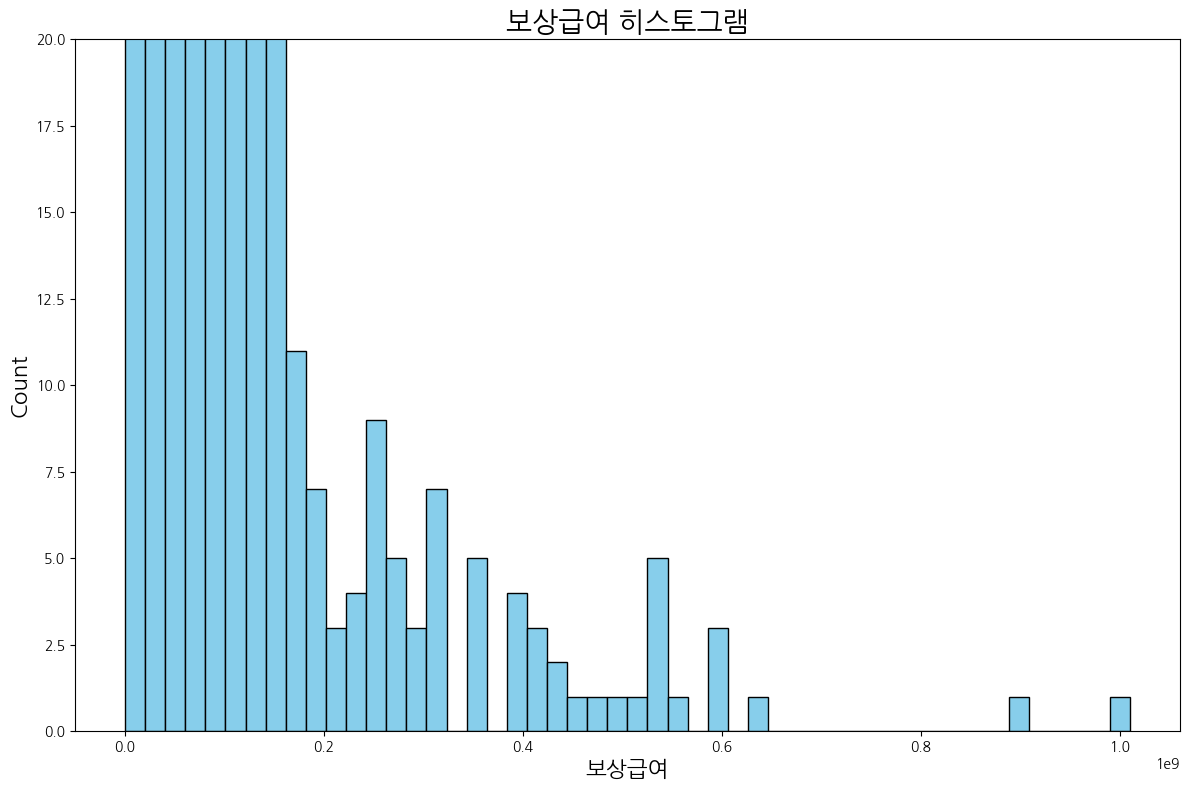

In [35]:
plotting_hist(data, '보상급여', 0, 20)

- 일정 금액 이상(0.6*1e9 이상은 특이 케이스로 빈도가 크지 않음)

In [36]:
count = (data['보상급여'] < 20_000_000).sum()
print(f"보상급여가 2천만 미만인 행의 개수: {count:,}개")


보상급여가 2천만 미만인 행의 개수: 423,619개


# 종합
- 사고 파일 분석과 거의 유사
    - 한참 혈기왕성할 초중학생, 저학년, 남자가 사고율이 높음
    - 체육/식사/쉬는 시간에 뛰거나 장난 혹은 체육활동 시에 사고가 대부분을 차지함(약 60~70%)
    - 공에 의한 사고, 넘어지고 부딪히는 사고가 주로 발생
    - 이로인해 손, 발, 눈이 다치는 사고가 발생

- 보상 파일 분석
    - 보상 금액에 대한 추가 데이터가 존재
    - 데이터를 보았을 때 2천만원 미만인 데이터가 약 99%차지.

# 상관관계 확인

일반학생이 대부분이 '사고자 구분' 항목은 너무 편향되어 있어 상관을 보기 어렵다고 판단. 제거

interval columns not set, guessing: ['추정나이', '보상급여']


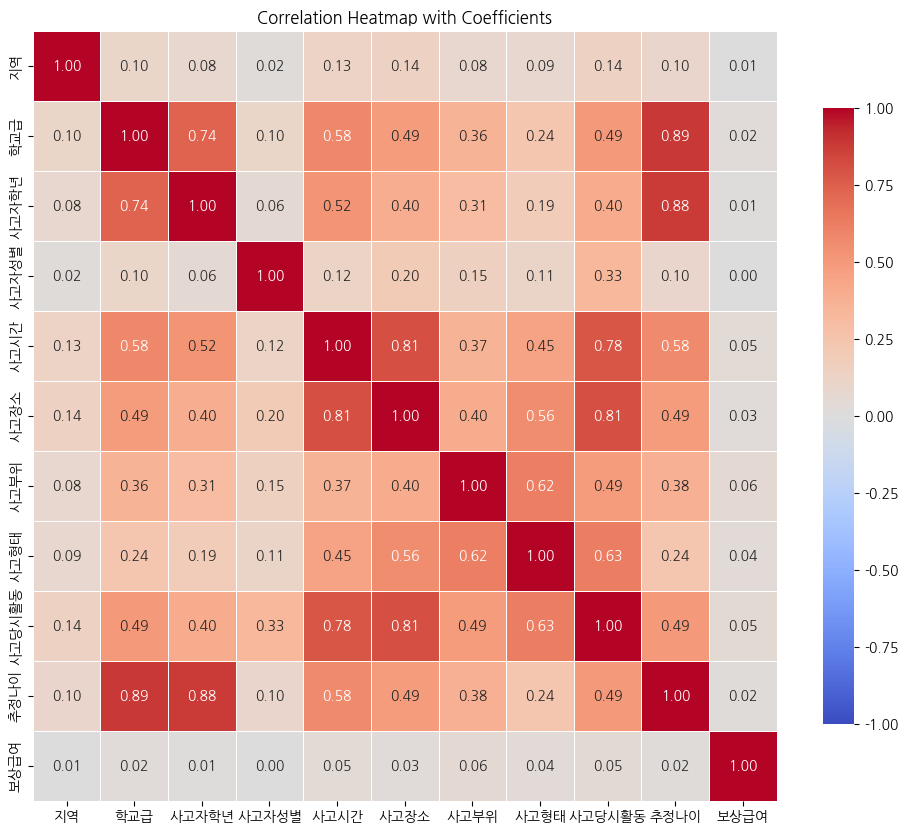

In [41]:
import phik
from phik import resources, report
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

data_for_cor = data.drop(columns=['사고자구분'], inplace = False)
cor_matrix = data_for_cor.phik_matrix()

plt.figure(figsize=(12, 10))
sns.heatmap(
    cor_matrix,
    annot=True,            # 상관계수 표시
    fmt=".2f",             # 소수점 2자리
    cmap="coolwarm",       # 색상맵
    vmin=-1, vmax=1,       # 상관계수 범위
    linewidths=0.5,        # 셀 간격
    cbar_kws={"shrink": .8} # colorbar 크기 조절
)
plt.title("Correlation Heatmap with Coefficients")
plt.show()

- 사고자 학년, 학교급, 추정나이 상관: 추정나이 자체가 이들의 파생 변수라 높은 상관은 당연한 결과
- 사고 시간, 사고 장소, 사고형태, 사고당시활동, 사고 부위: 학교 특성상 정해진 시간에 정해진 장소에 있을 가능성이 높고 장소에 따라 당시에 무엇을 했는지, 어떤 사고인지, 그래서 어딜 다쳤는지 유추할 수 있음

- 궁금한 것은 학교급/사고자학년/추정나이가 사고시간/장소/부위/당시활동/형태와 왜 상관이 높을까?라는 의문

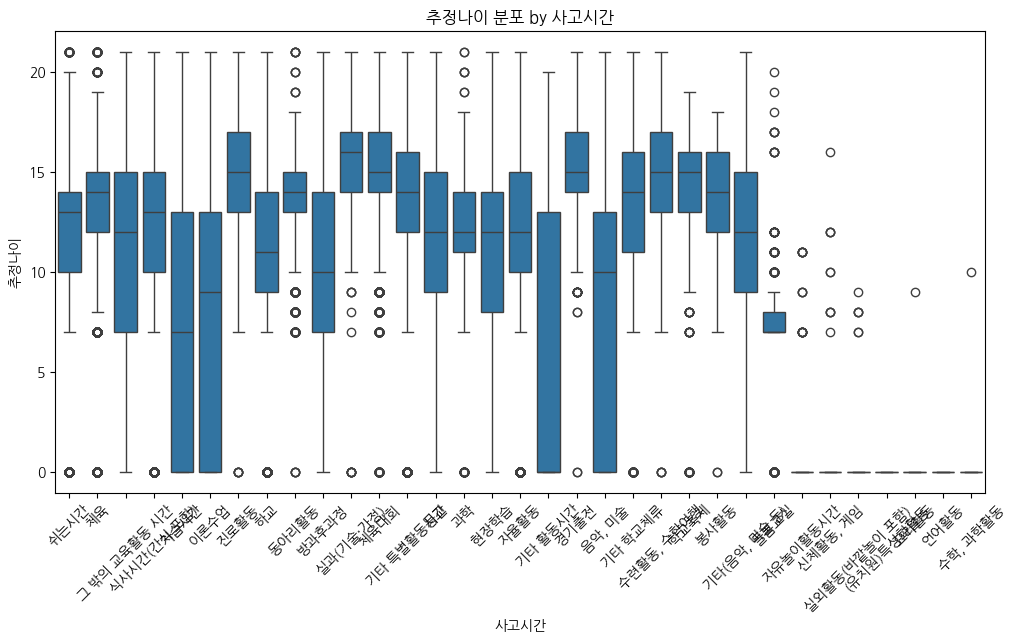

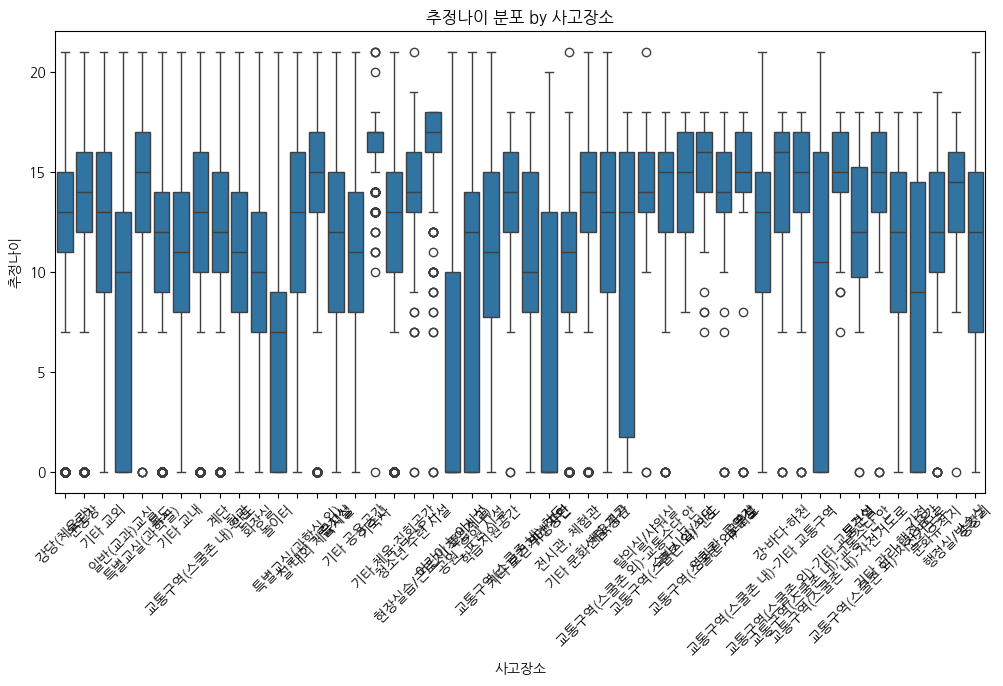

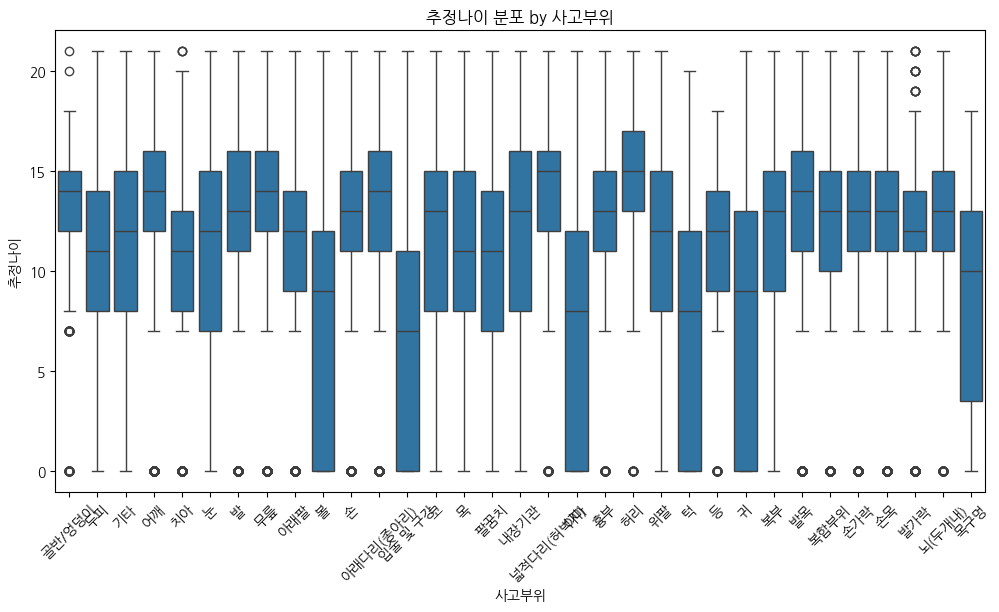

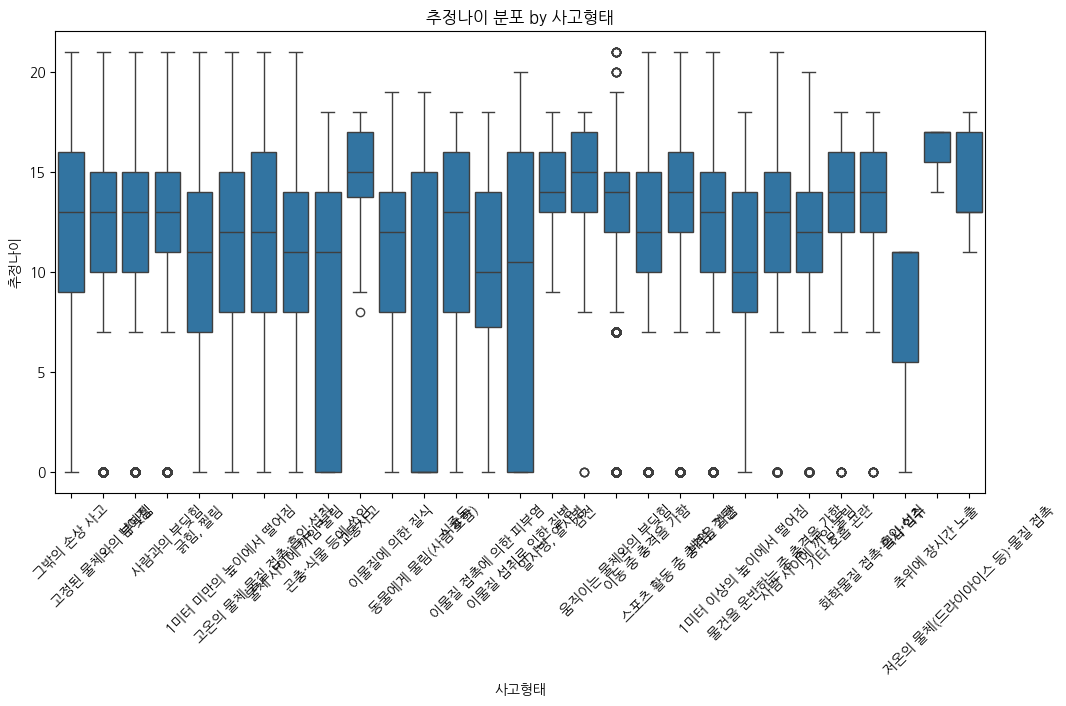

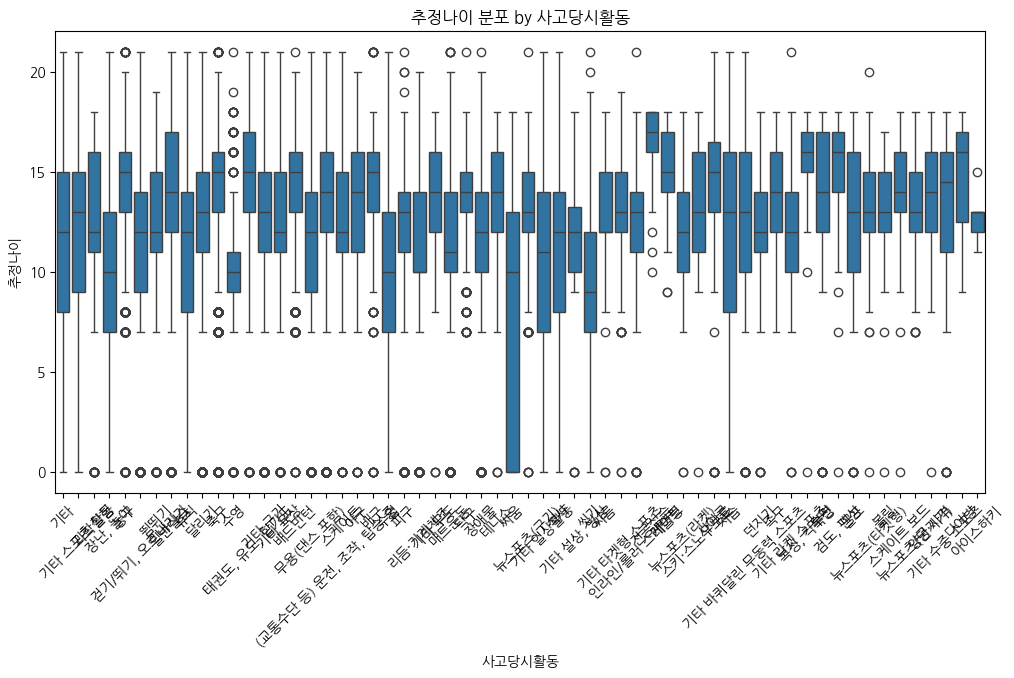

In [43]:
cat_cols = ['사고시간', '사고장소', '사고부위', '사고형태', '사고당시활동']

for col in cat_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=data[col], y=data['추정나이'])
    plt.title(f"추정나이 분포 by {col}")
    plt.xticks(rotation=45)
    plt.show()

- plot을 볼 때 대부분의 추정나이는 10~17세에 몰려있기 때문에 phik 기반의 binning 기법 상관은 이를 과대 추정한 것 같다.

## 학교급, 학년 구분 분석

- 추정나이가 아닌 학교급과 학년에 따라 구분하여 분석

In [70]:
def cross_tab_top3(df, col1, col2):
    import pandas as pd
    import matplotlib.pyplot as plt

    cross_tab = pd.crosstab(df[col1], df[col2], normalize='index')

    # 1️각 그룹별 top3 범주 구한 뒤 union
    top_categories_set = set()
    for bar_cat in cross_tab.index:
        group_row = cross_tab.loc[bar_cat]
        top3_categories = group_row.sort_values(ascending=False).head(3).index.tolist()
        top_categories_set.update(top3_categories)

    top_categories_list = list(top_categories_set)

    # 2️Stacked Bar Chart
    ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')

    # 3️Legend를 top_categories_list만 표시
    handles, labels = ax.get_legend_handles_labels()
    label_to_handle = dict(zip(labels, handles))

    filtered_handles = [label_to_handle[label] for label in labels if label in top_categories_list]
    filtered_labels = [label for label in labels if label in top_categories_list]

    ax.legend(filtered_handles, filtered_labels, title=col2, bbox_to_anchor=(1.05, 1))

    # 4️Annotate는 각 그룹별 top3만 표시
    for idx, bar_cat in enumerate(cross_tab.index):
        group_row = cross_tab.loc[bar_cat]
        top3_categories = group_row.sort_values(ascending=False).head(3).index.tolist()

        y_offset = 0
        for cat in cross_tab.columns:
            val = group_row[cat]
            if val > 0.01 and cat in top3_categories:
                ax.text(idx,
                        y_offset + val / 2,
                        f"{val*100:.1f}%",
                        ha='center', va='center',
                        fontsize=9, color='black')
            y_offset += val

    plt.ylabel('Proportion')
    plt.title(f'Stacked Bar Chart: Group-wise Top 3 Annot, Filtered Legend ({col1} vs {col2})')
    plt.tight_layout()
    plt.show()


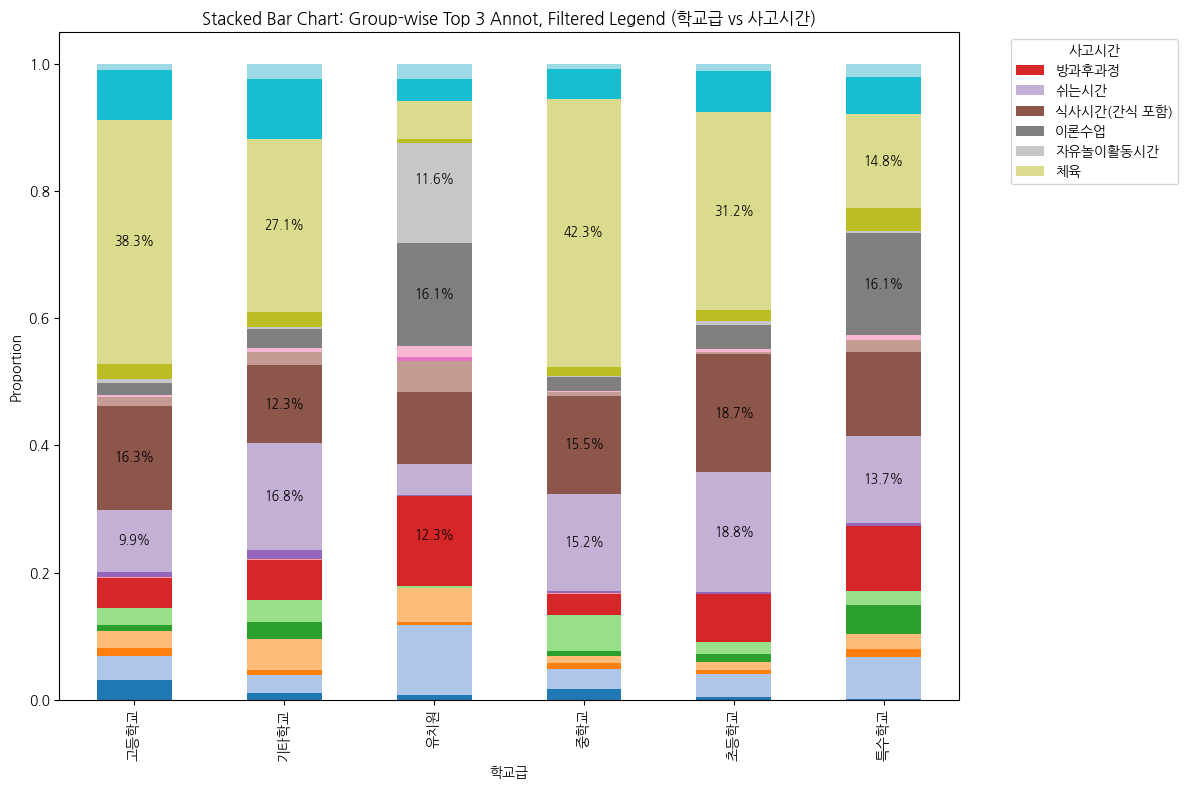

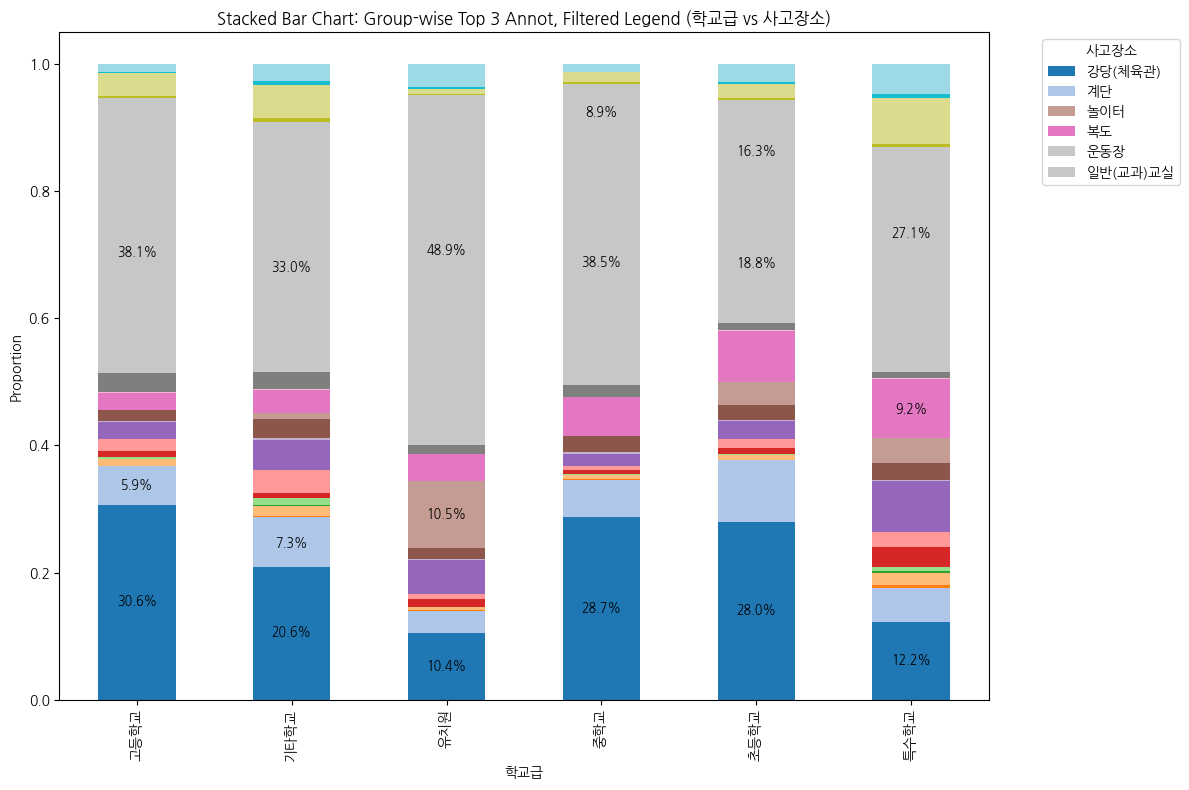

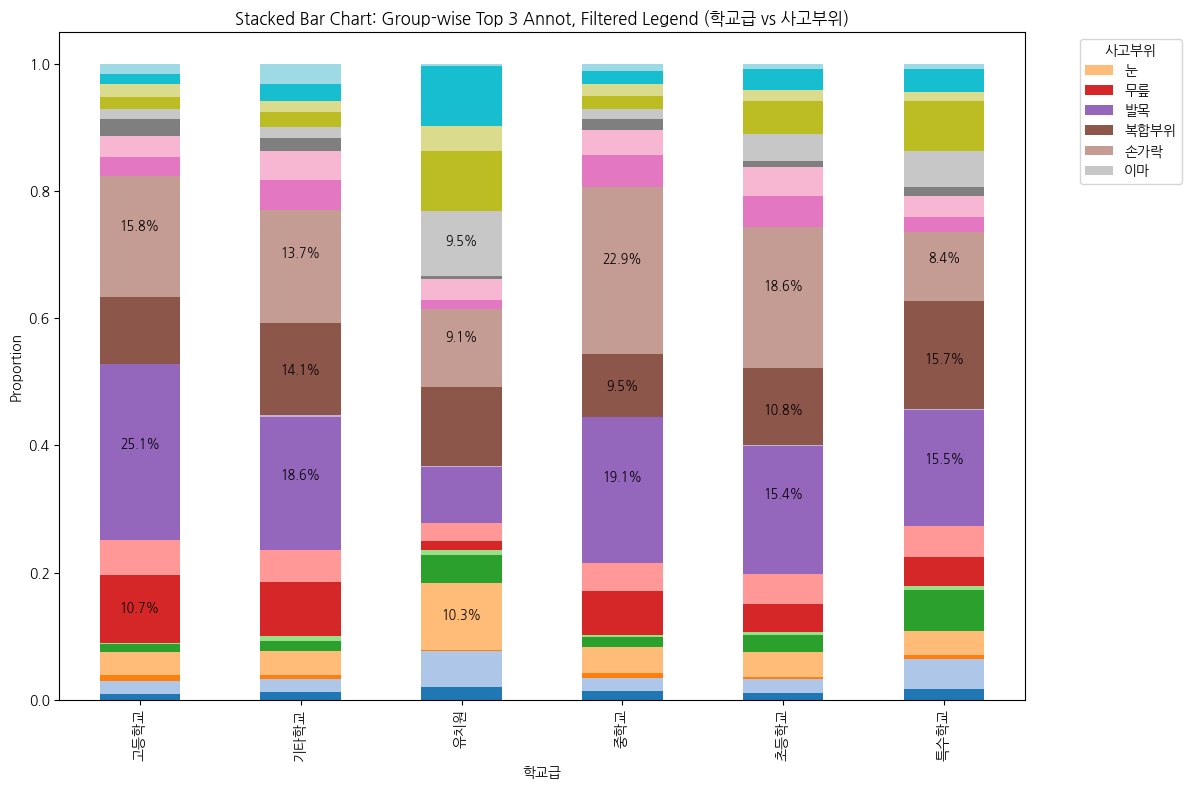

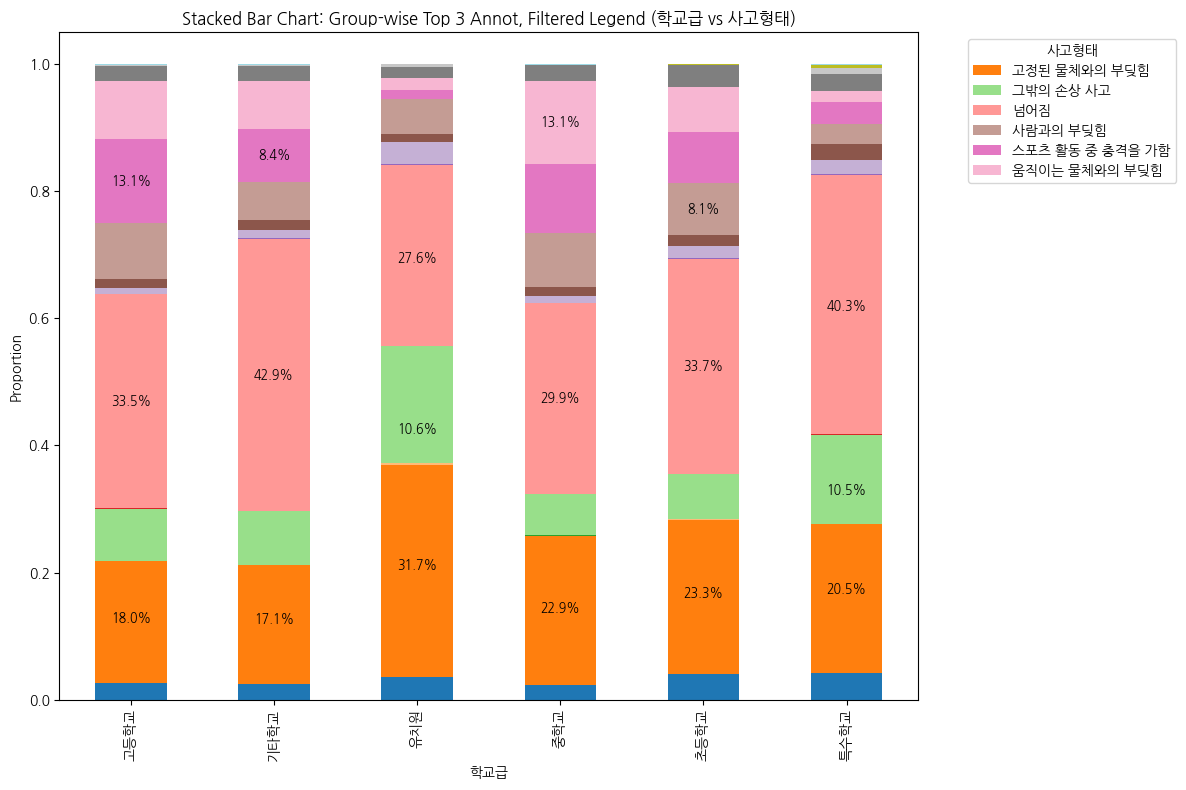

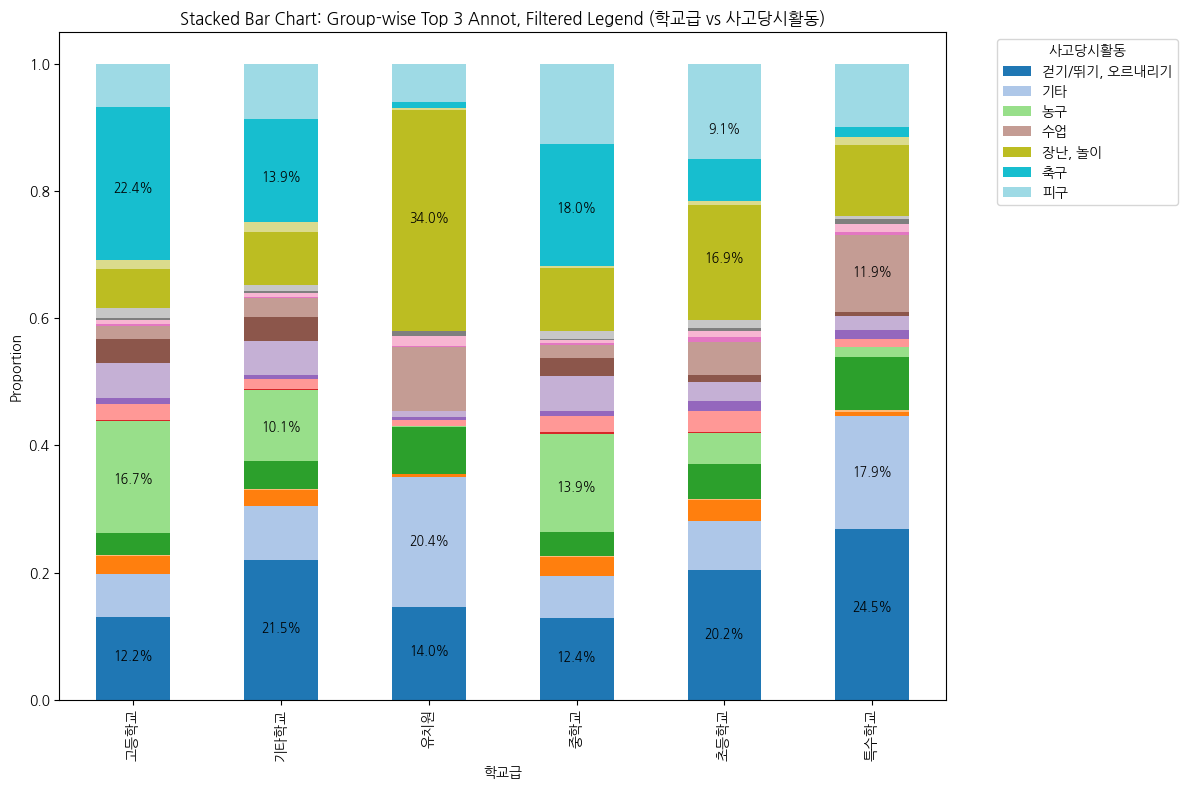

In [71]:
for i in cat_cols:
    cross_tab_top3(data, '학교급', i)

- 학교급의 경우 유치원생을 제외하고는 모두 비슷한 분포를 보임

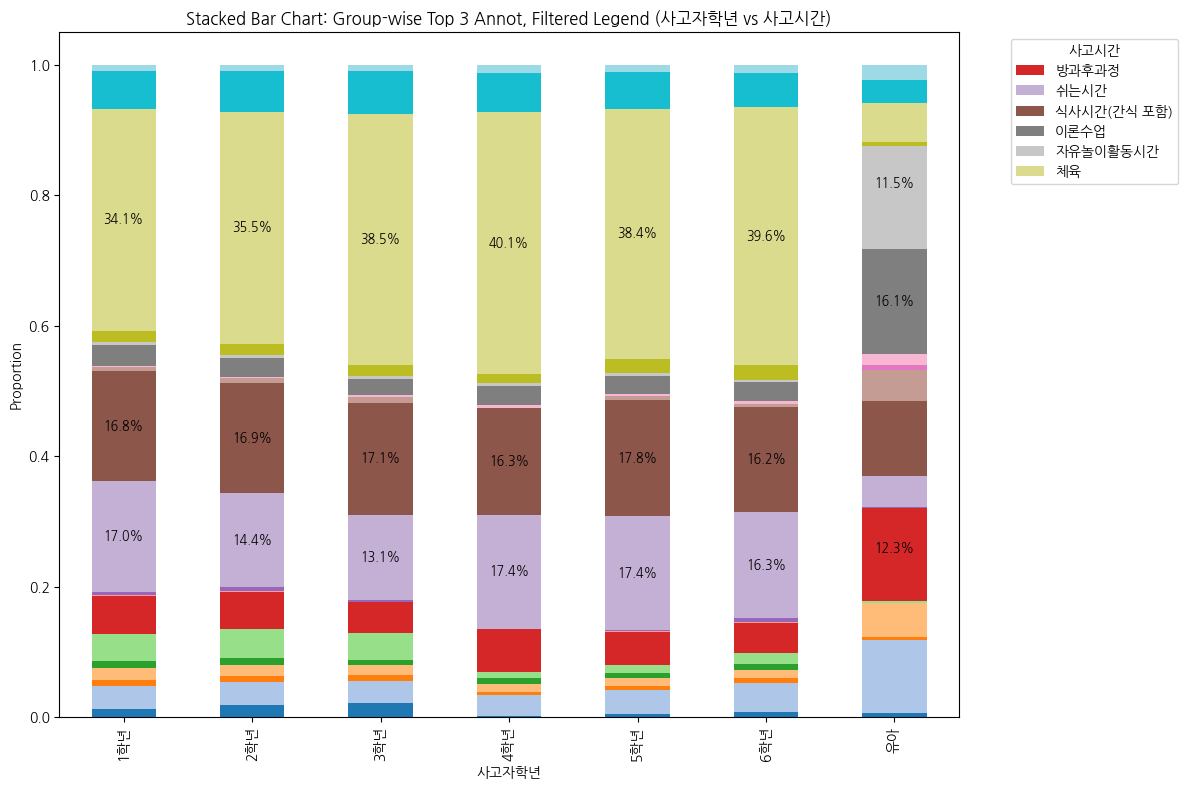

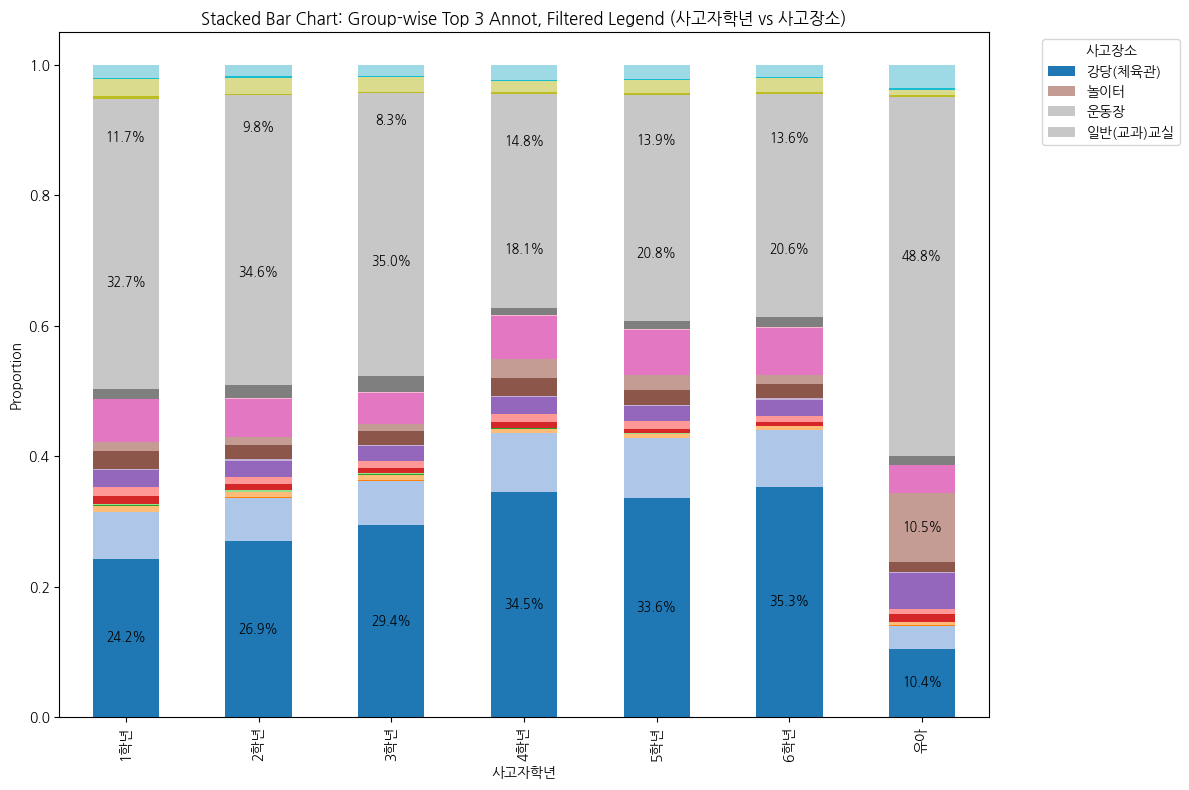

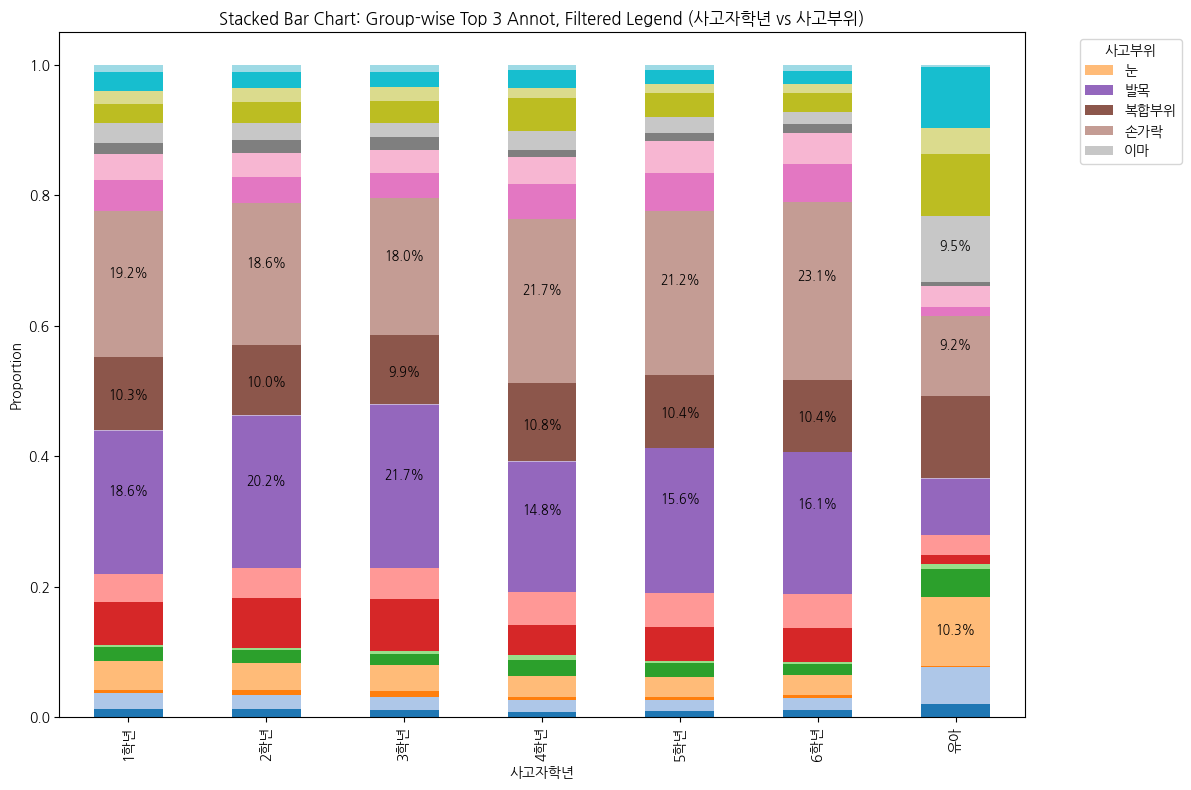

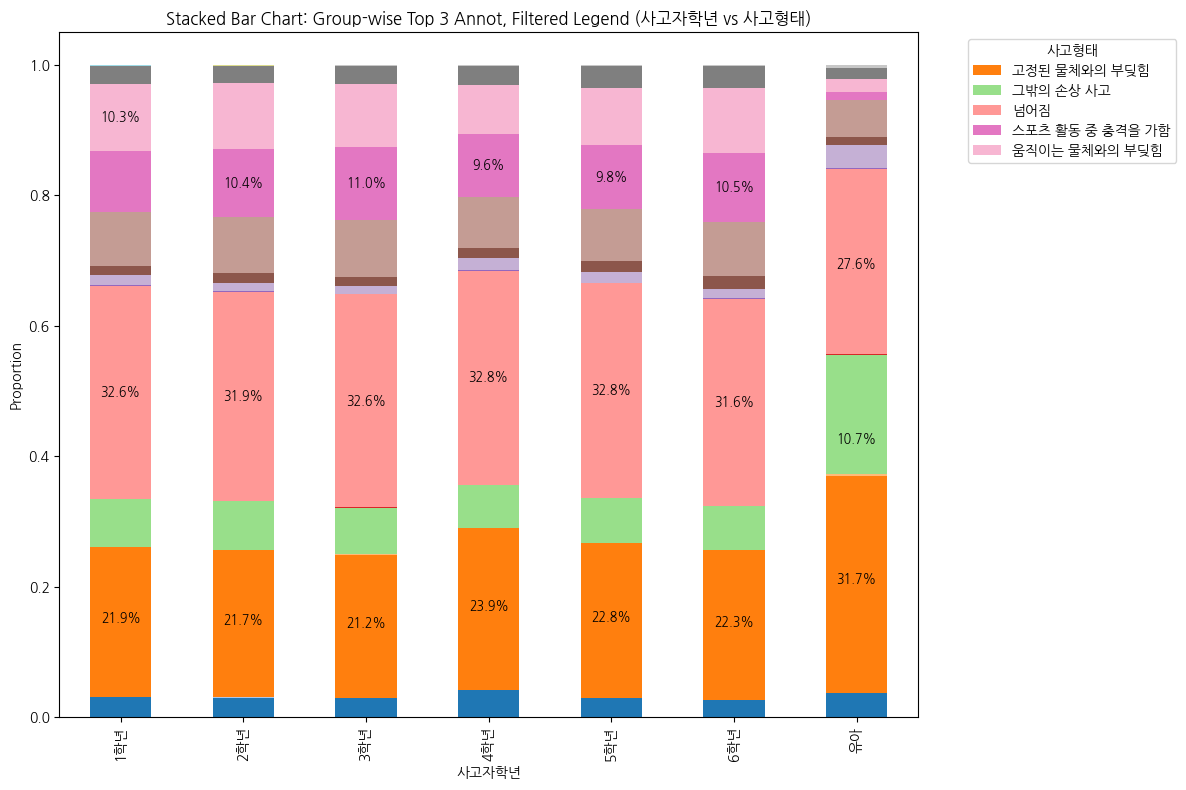

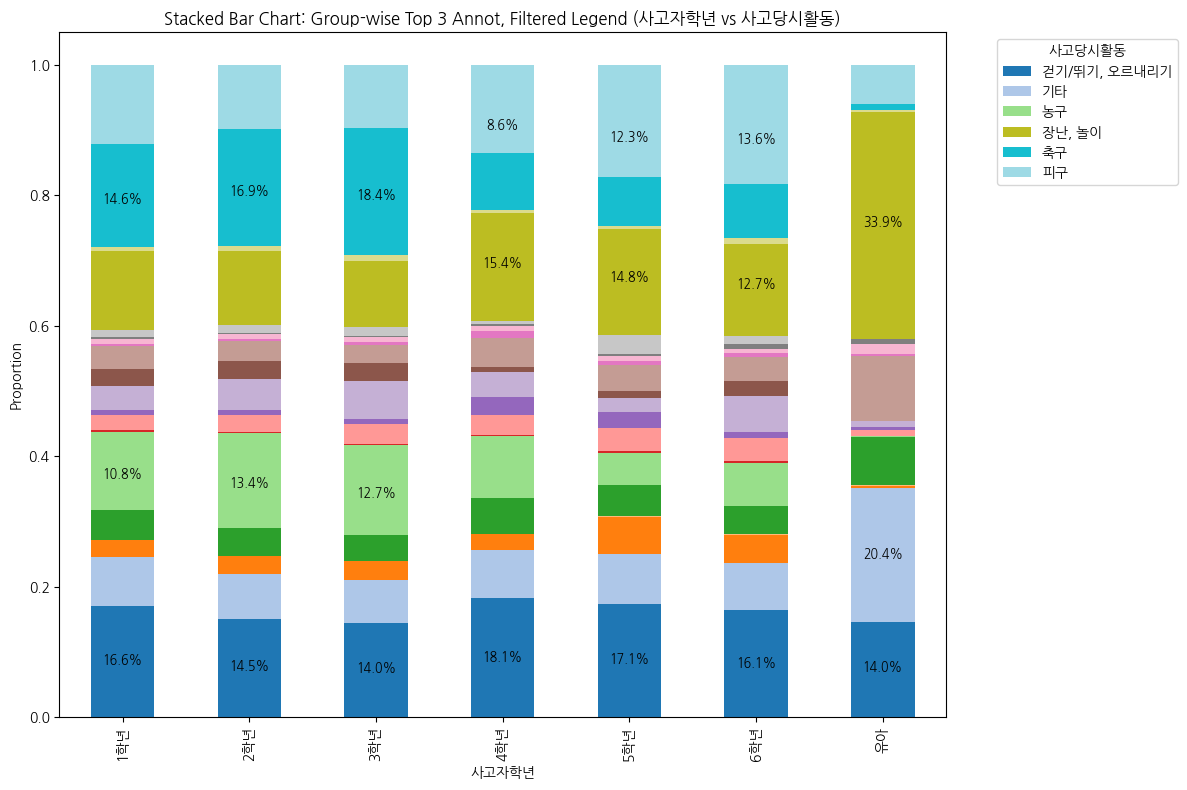

In [72]:
for i in cat_cols:
    cross_tab_top3(data, '사고자학년', i)

- 사고자학년 또한 유치원생을 제외하고 모두 비슷한 분포를 보이지만 결국 사고형태는 넘어짐이 제일큼

- 종합
  - 상관 결과 일반적으로 상관이 있을 것이라는 요인들은 실제로 상관이 존재
  - 외 학년, 학교급, 추정나이의 경우 범주형 변수의 특성 상 상관이 높게 생긴 것으로 확인
    - 단, 실제로 학교급/사고자학년에서 유치원생의 요인이 크게 다르다는 것은 사실
   